# Mini Project - Regression Models 
* Process of construction, training, evaluation and selection of models for regression

Developer: Andre Kim Scarton

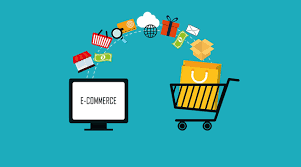

# Description
An e-commerce company markets products throught its web site and through your mobile app.
To make a purchase, a customer register on the portal(using the website or app).
Each time the customer logs in, the system records the time spent logged in, whether in the app or on the website.
For each customer, the company keeps a record of sales with the total amount spent a month.
The company would like to increase sales, but the budget allows it to invest only on the website or app right now.


# Objective
The objective is to improve the customer experience during the navigation in the system, increasing the logged time, increasing the engagement and consequently increasing sales

In [1]:
!pip install model_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the dataset

In [3]:
# Load the data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfolio/26-Mini-Projeto2/dados/dataset.csv')

In [4]:
# Shape 
data.shape

(500, 5)

In [5]:
# Info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [6]:
# Sample 
data.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
256,1.139094,32.078948,12.725909,36.544664,357.863719
91,2.804014,32.997459,12.589241,37.332241,476.139247
57,4.742578,33.105438,11.965020,37.277812,554.722084
457,3.376688,33.292587,11.906508,38.422865,502.132789
239,5.039955,32.407148,13.808799,37.426769,662.961088
275,3.803365,32.004753,11.395209,37.332814,463.745981
255,2.909008,34.330750,13.722454,35.773116,558.427257
257,2.685285,33.605799,13.685119,34.891983,529.056663
383,2.627625,33.344509,10.969803,35.974578,403.766902
169,3.218265,34.709323,10.651794,37.146007,468.445737


## Exploratory Data Analysis

In [7]:
# Columns 
data.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [8]:
# Correlation (table)
data.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


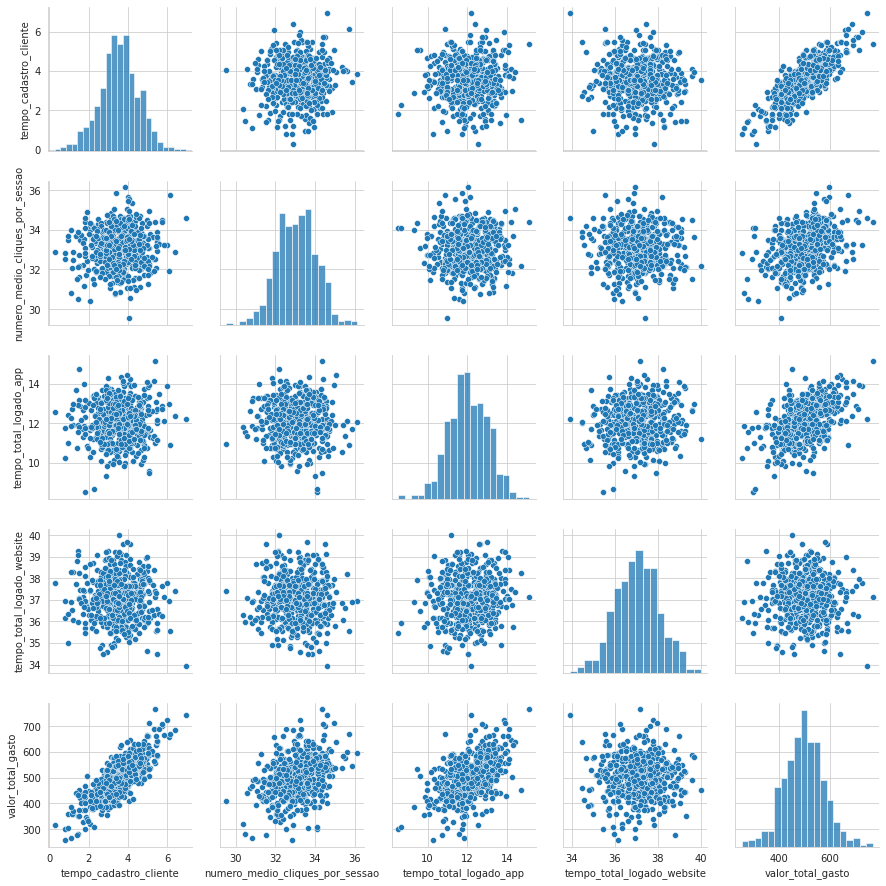

In [9]:
# Correlation (Visual)
sns.pairplot(data)

### Analysis 1 - Relationship Between Time on the website and Amount Spent

<Figure size 1296x864 with 0 Axes>

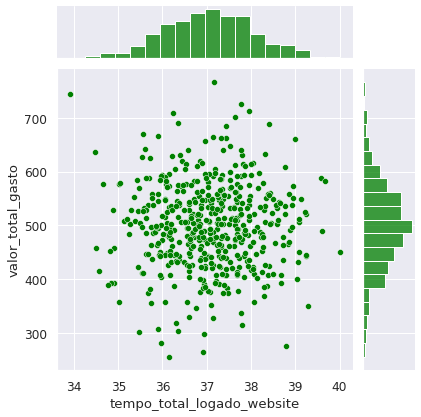

In [10]:
# Plot 
plt.figure(figsize=(18,12))
sns.set(font_scale=1.1)
sns.jointplot(data= data,
             x = 'tempo_total_logado_website',
             y = 'valor_total_gasto',
             color = 'green')

Looking at the histograms, we can see that the data are normally distributed (follow a normal distribution).

Looking at the scatter plot, there doesn't seem to be a correlation between the two variables.

Let's confirm by calculating the correlation coefficient between them.


In [11]:
# Correlation
data[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


There doesn't seem to be a correlation between the time logged into the website and the amount spent by customers.

### Analysis 2 - Relationship Between Time on the app and amount spent 

In [12]:
# Columns 
data.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

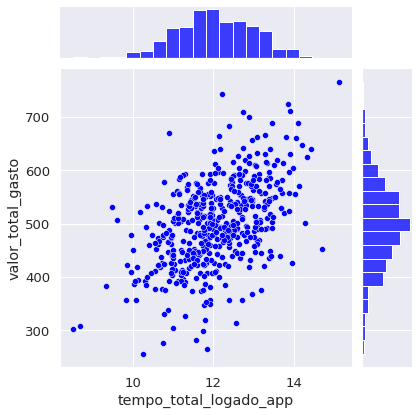

In [13]:
# Plot 
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = data, 
              x = 'tempo_total_logado_app', 
              y = 'valor_total_gasto', 
              color = 'blue')

Looking at the histograms, we can see that the data are normally distributed (follow a normal distribution).

Observing the scatter plot, there seems to be a positive correlation between the two variables.

Let's confirm by calculating the correlation coefficient between them.

In [14]:
# Correlation 
data[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


The data has a moderate positive correlation. We can deduce that the total amount spent monthly tends to increase if the customer spends more time logged into the app 

### Analysis 3 - Relationship Between time on the App and Registration Time 

In [15]:
# Columns 
data.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

<Figure size 1296x864 with 0 Axes>

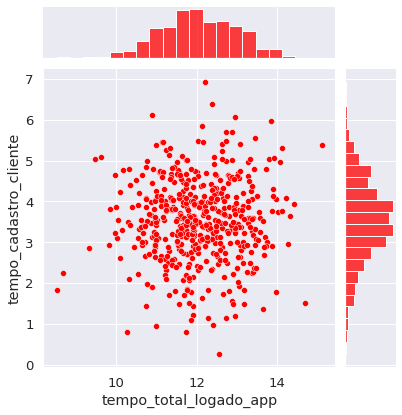

In [16]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = data, 
              x = 'tempo_total_logado_app', 
              y = 'tempo_cadastro_cliente', 
              color = 'red')

Looking at the histograms, we can see that the data are normally distributed (follow a normal distribution).

From the scatterplot we can see that the data is very dense in the middle of the plot and there is no clear correlation.

We can deduce that there are many customers who have been members for 3-4 years and spend approximately 11.5-12.5 minutes on the app.

### Analysis 4 - Relationship Between Registration Time and Amount Spent 

In [17]:
# Columns 
data.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

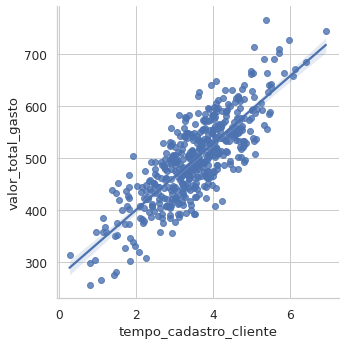

In [18]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = "valor_total_gasto", x = "tempo_cadastro_cliente", data = data)

In [19]:
# Correlation 
data[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


From the implot and the correlation coefficient, we can see that the registration time and the total amount spent have a strong positive correlation, that is, as the customer becomes older (more registration time), the total amount spending by customers also increases.

Another thing to note is that the shadow around the line is very thin, which means that the errors between the guess (line) and the data points are relatively small.

### Analysis 5 - Relatiomship Between Time Logged in the App and Time Logged in the Web Site 

<Figure size 1296x864 with 0 Axes>

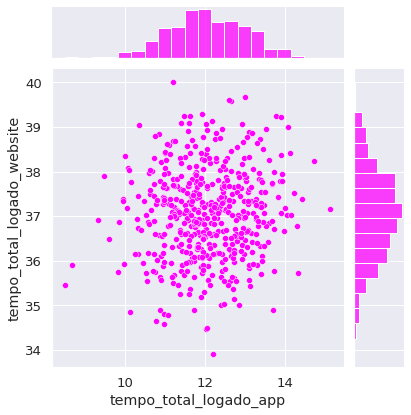

In [20]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = data, 
              x = 'tempo_total_logado_app', 
              y = 'tempo_total_logado_website', 
              color = 'magenta' )

We have not detected any critical issues and can move forward. Let's keep the predictor variable with low correlation and validate this relationship with the target variable in the final model 

## Pre-Processing Data for Building Machine Learning Models 

In [21]:
data.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [22]:
# Input variables (predictor variables)
X = data[['tempo_cadastro_cliente', 
           'numero_medio_cliques_por_sessao',
           'tempo_total_logado_app', 
           'tempo_total_logado_website']]

In [23]:
# Output variables (target)
y = data['valor_total_gasto']

In [24]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [25]:
len(X_train)

350

In [26]:
len(X_test)

150

### Standardization

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(X_train)

StandardScaler()

In [29]:
X_train = scaler.transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
X_train[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [32]:
X_test[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

### Construction, Training and Evaluation of Model 1 with Linear Regression (Benchmark)

In [33]:
# Create the Model 
model_v1 = LinearRegression()

In [34]:
model_v1.fit(X_train, y_train)

LinearRegression()

In [35]:
print('Coefficients: \n', model_v1.coef_)

Coefficients: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [36]:
# Coefficients of predictor variables
df_coef = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficients'])
df_coef

,Coefficients
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


### Model Evaluation

In [37]:
# Predictions with test data 
pred_v1 = model_v1.predict(X_test)

In [38]:
# Print the first 10 predictions
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

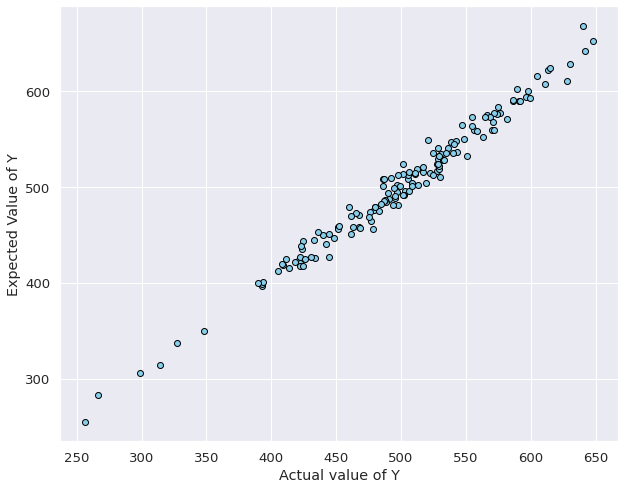

In [39]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Actual value of Y')
plt.ylabel('Expected Value of Y');

From the scatterplot, we can see that there is a very strong correlation between the predicted y's and the actual y's in the test data. This means that we have a very good model.

### Metrics

In [40]:
# Average amount spent by customers 
data['valor_total_gasto'].mean()

499.31403826080003

In [41]:
# Minimum value
data['valor_total_gasto'].min()

256.6705823

In [42]:
# Max value
data['valor_total_gasto'].max()

765.5184619

In [43]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, pred_v1)

7.762418645778977

MAE predicts that, on average, our model's predictions (of amounts spent) are off by approximately 7.76 reais, which is a small amount compared to the average amount spent per customer 

In [44]:
# MSE - Mean Squared Error 
mean_squared_error(y_test, pred_v1)

94.95654308438658

In [45]:
# RMSE - Root Mean Square Error
np.sqrt(mean_squared_error(y_test,pred_v1))

9.744564797074654

The RMSE predicts that, on average, our model's predictions (of amounts spent) are off by approximately 9.74, which is a small amount compared to the average amount spent per customer.

In [46]:
# Coefficient R2
r2_score(y_test, pred_v1)

0.9813622791776302

In [47]:
# Explained Variance
explained_variance_score(y_test, pred_v1)

0.981744918342864

Our model is able to explain 98% of the variance in the data, which is excellent.

The 98% R2 coefficient and the other metrics demonstrate that this is a very good model. 

### Residuals

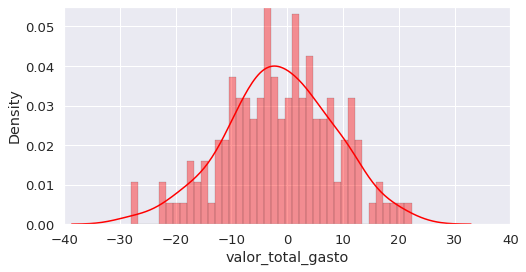

In [48]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

The residuals are approximately normally distributed, which indicates a good fit of the model.

### Construction, training and Evaluation of Model 2 with Ridge Regression.

In [49]:
# Create the model 
model_v2 = Ridge(alpha =1.0)

In [50]:
model_v2.fit(X_train, y_train)

Ridge()

In [51]:
print('Coefficients: \n',model_v2.coef_)

Coefficients: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [52]:
# Coefficients of predictor variables
df_coef = pd.DataFrame(model_v2.coef_, X.columns, columns =['Coefficient'])
df_coef

,Coefficient
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [53]:
# Predictions with test data 
pred_v2 = model_v2.predict(X_test)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

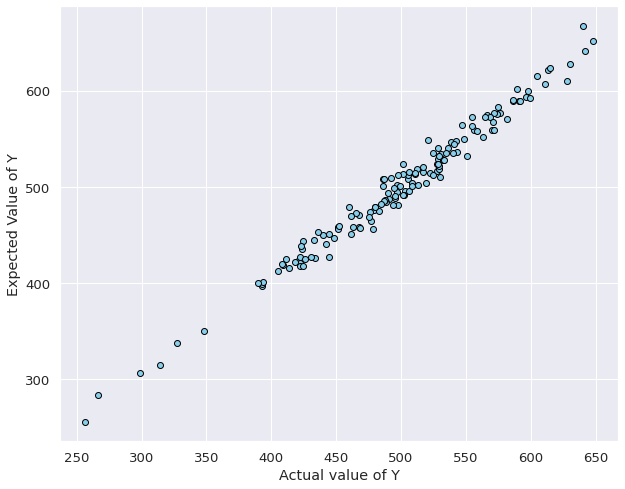

In [54]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Actual value of Y')
plt.ylabel('Expected Value of Y');

In [55]:
# MAE
mean_absolute_error(y_test, pred_v2)

7.764151148981964

In [56]:
# MSE
mean_squared_error(y_test, pred_v2)

94.93731602493466

In [57]:
# RMSE
np.sqrt(mean_squared_error(y_test,pred_v2))

9.7435781941202

In [58]:
# Coefficient R2
r2_score(y_test,pred_v2)

0.981366052994101

In [59]:
# Explained Variance 
explained_variance_score(y_test, pred_v2)

0.9817472659016085

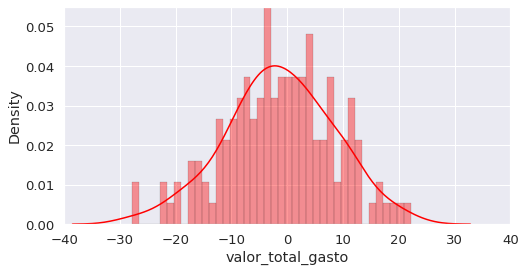

In [60]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

### Construction, training and Evaluation of Model 2 with Lasso Regress

In [61]:
# Create the model 
model_v3 = Lasso(alpha = 1.0)

In [62]:
# Training 
model_v3.fit(X_train, y_train)

Lasso()

In [63]:
print('Coefficient: \n', model_v3.coef_)

Coefficient: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [65]:
# Coefficient 
df_coef = pd.DataFrame(model_v3.coef_, X.columns, columns = ['Coefficient'])
df_coef

,Coefficient
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [67]:
# Predictions with test data 
pred_v3 = model_v3.predict(X_test)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

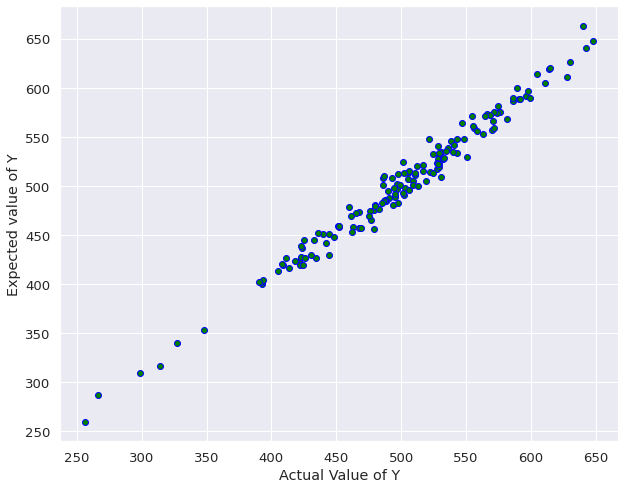

In [69]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Actual Value of Y')
plt.ylabel('Expected value of Y');

In [70]:
# MAE
mean_absolute_error(y_test,pred_v3)

7.7885046969510645

In [71]:
# MSE 
mean_squared_error(y_test, pred_v3)

96.05606348970672

In [72]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred_v3))

9.800819531534428

In [73]:
# Coefficient R2
r2_score(y_test, pred_v2)

0.981366052994101

In [74]:
# Explained Variance 
explained_variance_score(y_test, pred_v3)

0.9815600649101045

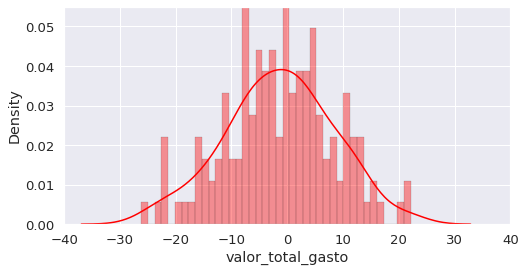

In [75]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v3), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

### Model Selection

Model 3 had a slightly higher error rate (RMSE) and can be discarded. Models 1 and 2 were very close and in this case we should choose the simplest model, which in our example is model 1

### Conclusion

In [76]:
data.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [78]:
# Coefficient 
df_coef_final = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficient'])
df_coef_final

,Coefficient
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


#### Interpretations of Coefficients:



*   Keeping all other features fixed, an increase of 1 unit in customer registration time is associated with an increase of R$ 63.74 in totalamount spent per customer per moth.

*   Holding all other features fixed, a 1 unit increase in the average number of clicks per session is associated with a R$ 26.24 increase in the total amount spent per customer per month.

* Keeping all other features fixed, an increase of 1 unit in total time logged into the app is associated with an increase of R$ 38.57 in the total amount spent per customer per month.

* Keeping all other resources fixed, a 1 unit increase in total time logged into the website is associated with a R$ 0.68 increase in the total amount spent per customer per month.



We can see that it will be more profitable for the company to invest in updating its app since the return will be greater. In addition, its is important to create policies to retain the customer for longer, as this also leads to increased sales. The app update itself will be a way to retain the customer for longer.

It does not pay, at this moment, to invest in updating the website, as the return will be minimal.